In [12]:
from House_Price_function import *
import re

In [4]:
%time location_name , house_name , house_price , location_div = search_real_estate('GyeongGi')

CPU times: user 6min 4s, sys: 13.3 s, total: 6min 17s
Wall time: 3h 2min 5s


In [5]:
import pandas as pd
df = pd.DataFrame()
df['location_name'] = location_name
df['house_name'] = house_name
df['house_price'] = house_price
df['location_div'] = location_div

In [6]:
df.to_csv('gyeonggi_location_info.csv',index=False)

In [7]:
tuned_df = tuning_df(df)

57549

In [8]:
tuned_df.to_csv('gyeonggi_location_info.csv',index=False)

In [24]:
train_df = pd.read_csv('gyeonggi_location_info.csv')

In [25]:
train_df.head()

,location_name,house_name,house_price,location_div
0,가평군,북한강코아루,25000,저/18
1,가평군,청평삼성쉐르빌,20500,중/15
2,가평군,북한강코아루,25000,저/18
3,가평군,북한강코아루,22000,저/18
4,가평군,북한강코아루,24500,저/18


In [26]:
train_df['supply_loc'] = [i[:i.find('/')] for i in train_df['location_div']] 
train_df['only_loc'] = [i[i.find('/'):] for i in train_df['location_div']] 
train_df['supply_location'] = [','.join(re.findall('\d',i)).replace(',','') for i in train_df['supply_loc']]
train_df['only_location'] = [','.join(re.findall('\d',i)).replace(',','') for i in train_df['only_loc']]

In [27]:
train_df

,location_name,house_name,house_price,location_div,supply_loc,only_loc,supply_location,only_location
0,가평군,북한강코아루,25000,저/18,저,/18,,18
1,가평군,청평삼성쉐르빌,20500,중/15,중,/15,,15
2,가평군,북한강코아루,25000,저/18,저,/18,,18
3,가평군,북한강코아루,22000,저/18,저,/18,,18
4,가평군,북한강코아루,24500,저/18,저,/18,,18
5,가평군,북한강코아루,21000,중/18,중,/18,,18
6,가평군,청평삼성쉐르빌,18000,고/15,고,/15,,15
7,가평군,청평경남아너스빌,20500,중/14,중,/14,,14
8,가평군,청평삼성쉐르빌,31500,고/15,고,/15,,15
9,가평군,청평삼성쉐르빌,21000,저/15,저,/15,,15


In [28]:
train_df['price_per_loc'] = [int(train_df['house_price'][i]) / int(train_df['only_location'][i]) for i in range(len(train_df))]

In [29]:
train_df.tail()

,location_name,house_name,house_price,location_div,supply_loc,only_loc,supply_location,only_location,price_per_loc
57544,화성시,금강펜테리움센트럴파크동탄,23000,13/15,13,/15,13,15,1533.333333
57545,화성시,동탄에듀밸리사랑으로부영,43500,20/25,20,/25,20,25,1740.000000
57546,화성시,동탄대원칸타빌포레지움,55500,3/25,3,/25,3,25,2220.000000
57547,화성시,메타폴리스,38000,12/60,12,/60,12,60,633.333333
57548,화성시,풍성위버폴리스,2000,11/41,11,/41,11,41,48.780488


In [47]:
train_df.to_csv('gyeonggi_train_df.csv')

In [46]:
np.mean(train_df['price_per_loc'])

1953.7155340038719

In [30]:
unique_loc_ls = list(set(train_df['location_name']))

In [31]:
testing_df = pd.DataFrame()
for i in unique_loc_ls:
    testing_df.append(train_df[train_df['location_name']==i])

In [32]:
unique_loc_av = [train_df[train_df['location_name']==i].describe()['price_per_loc'][1] for i in unique_loc_ls]

In [35]:
import matplotlib as mpl
mpl.rc('font', family='nanumgothic')
mpl.rc('axes', unicode_minus=False)

In [37]:
import numpy as np
import matplotlib.pylab as plt

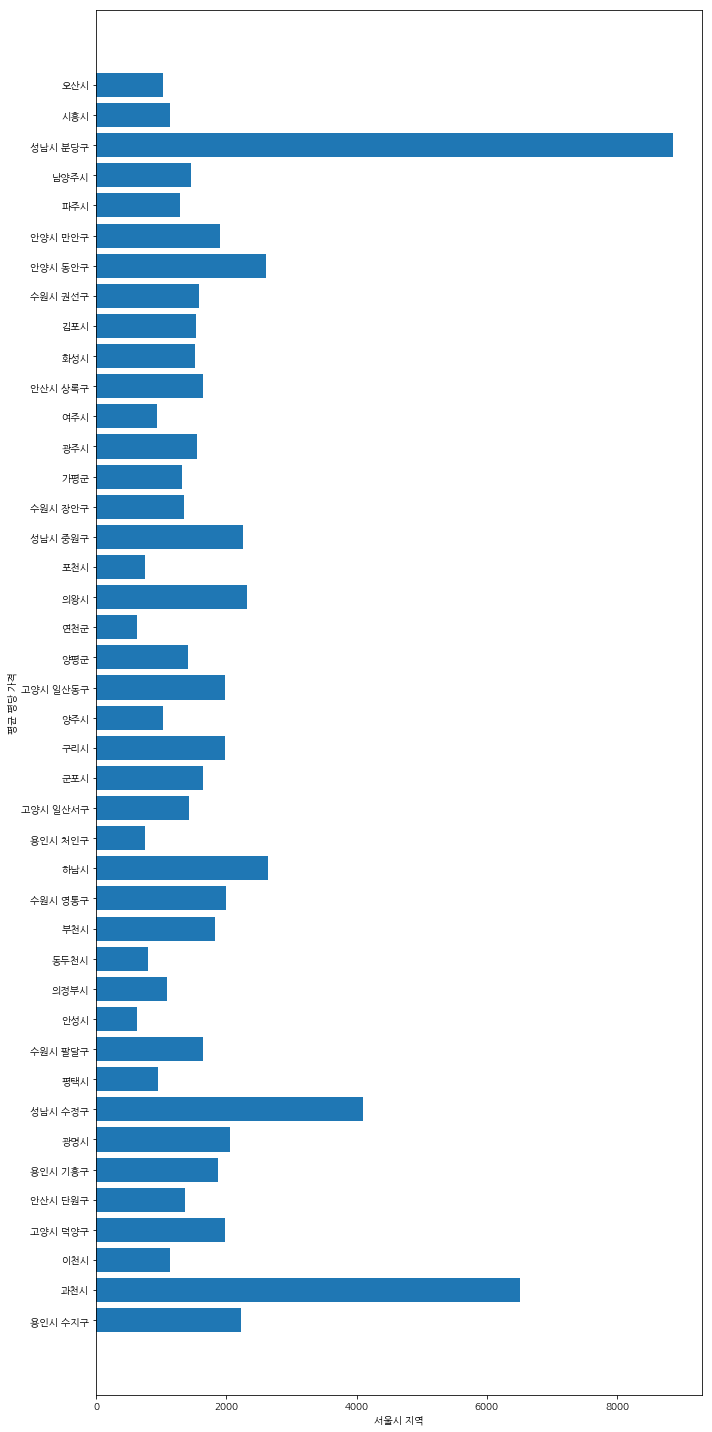

In [45]:
plt.figure(figsize=(10,20))
y = unique_loc_av
x = np.arange(len(y))
xlabel = unique_loc_ls
plt.barh(x, y)
plt.yticks(x, xlabel)
# plt.yticks(sorted(y))
plt.xlabel("서울시 지역")
plt.ylabel("평균 평당 가격")
plt.tight_layout()
plt.show()